<a href="https://colab.research.google.com/github/cardstdani/StorageColabNotebooks/blob/main/Python_Class_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import math
import numpy as np
import pandas
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

Epoch 1/300
7/7 [==============================] - 1s 5ms/step - loss: 0.2434 - mse: 0.1058 - lr: 0.0100
Epoch 2/300
7/7 [==============================] - 0s 5ms/step - loss: 0.2112 - mse: 0.0810 - lr: 0.0100
Epoch 3/300
7/7 [==============================] - 0s 6ms/step - loss: 0.1886 - mse: 0.0627 - lr: 0.0100
Epoch 4/300
7/7 [==============================] - 0s 5ms/step - loss: 0.1699 - mse: 0.0503 - lr: 0.0100
Epoch 5/300
7/7 [==============================] - 0s 6ms/step - loss: 0.1739 - mse: 0.0541 - lr: 0.0100
Epoch 6/300
7/7 [==============================] - 0s 4ms/step - loss: 0.1633 - mse: 0.0461 - lr: 0.0100
Epoch 7/300
7/7 [==============================] - 0s 7ms/step - loss: 0.1662 - mse: 0.0475 - lr: 0.0100
Epoch 8/300
7/7 [==============================] - 0s 5ms/step - loss: 0.1646 - mse: 0.0480 - lr: 0.0100
Epoch 9/300
7/7 [==============================] - 0s 5ms/step - loss: 0.1607 - mse: 0.0442 - lr: 0.0100
Epoch 10/300
7/7 [==============================] - 0s 

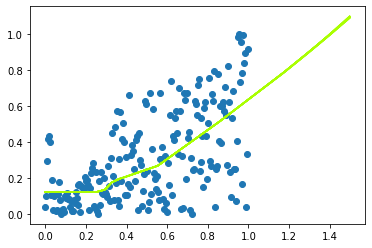

In [ ]:
import random
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

df = pandas.read_csv("/content/drive/MyDrive/loteria_processed.csv")

x = np.array(df["Años"]).reshape(-1, 1)
y = np.array(df["N"]).reshape(-1, 1)

scalerX, scalerY = MinMaxScaler(feature_range=(0, 1)), MinMaxScaler(feature_range=(0, 1))
x, y = scalerX.fit_transform(x), scalerY.fit_transform(y)
plt.scatter(x, y)

model = tf.keras.Sequential([                             
                             tf.keras.layers.Dense(16, activation=tf.keras.activations.relu),
                             #tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Dense(32, activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(32, activation=tf.keras.activations.relu),
                             tf.keras.layers.Dropout(0.4),
                             tf.keras.layers.Dense(16, activation=tf.keras.activations.relu)])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss=tf.keras.losses.MAE, metrics=["mse"])

history = model.fit(x, y, validation_split=0, epochs=300, callbacks=[tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.01 * 0.1**math.floor(epoch / 100))])
x = np.append(x, np.arange(1, 1.5, 0.001)).reshape(-1, 1)
plt.plot(x, model.predict(x), color="#aaff00")
#plt.plot(x, scalerY.fit_transform([2*i for i in x]), color="#ff0000")
plt.show()

In [ ]:
import datetime

date = datetime.datetime.now()
print(date.microsecond)

505218


In [ ]:
np.array(np.linspace(-100, 100, 100)).reshape(-1, 1).shape

(100, 1)

In [ ]:
print(model.weights, 100*history.history["loss"][-1])

[<tf.Variable 'dense_3/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.7868204]], dtype=float32)>, <tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32, numpy=array([0.11816192], dtype=float32)>] 9.097208082675934


In [ ]:
df = pandas.read_csv("/content/drive/MyDrive/loteria_processed.csv")

x = np.array(df["Años"]).reshape(-1, 1)
y = np.array(df["N"]).reshape(-1, 1)

print(max(y), x[list(y).index(min(y))])

scalerX, scalerY = MinMaxScaler(feature_range=(0, 1)), MinMaxScaler(feature_range=(0, 1))
x, y = scalerX.fit_transform(x), scalerY.fit_transform(y)
plt.scatter(x, y, marker=".")

model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss=tf.keras.losses.MAE, metrics=["mse"])

history = model.fit(x, y, validation_split=0, epochs=300, callbacks=[tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.01 * 0.1**math.floor(epoch / 50))])
plt.plot(x, (model.predict(x)), color="#aaff00")
plt.show()

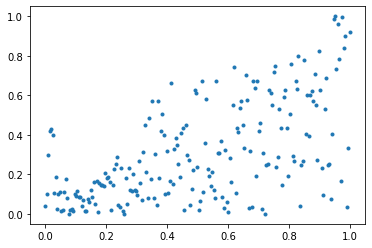

In [ ]:
df = pandas.read_csv("/content/drive/MyDrive/loteria_processed.csv")

x = np.array(df["Años"]).reshape(-1, 1)
y = np.array(df["N"]).reshape(-1, 1)


scalerX, scalerY = MinMaxScaler(feature_range=(0, 1)), MinMaxScaler(feature_range=(0, 1))
x, y = scalerX.fit_transform(x), scalerY.fit_transform(y)
plt.scatter(x, y, marker=".")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas

df = pandas.read_csv("/content/drive/MyDrive/loteria.csv")

x, y = [], []
for i in df.values.tolist()[:]:
  val = i[0].split(";")
  x.append(int(val[0]))
  y.append(int(''.join([i for i in val[2] if i.isnumeric()])))

plt.scatter(x, y, marker=".")
df = pandas.DataFrame({'Años':x, 'N':y})
df.to_csv('loteria.csv', index=False)
print(df)

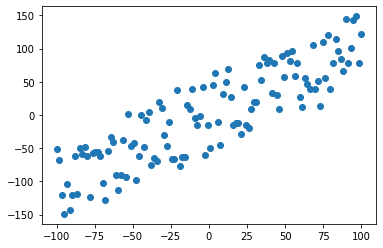

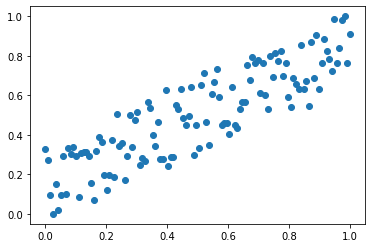

In [ ]:
import random, math
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

x = np.array(np.linspace(-100, 100, 120)).reshape(-1, 1)
y = np.array([(i**1 + random.randint(-60, 60)) for i in x]).reshape(-1, 1)

plt.scatter(x, y)
scalerX, scalerY = MinMaxScaler(feature_range=(0, 1)), MinMaxScaler(feature_range=(0, 1))
x, y = scalerX.fit_transform(x), scalerX.fit_transform(y)

plt.figure()
plt.scatter(x, y)

In [ ]:
model.weights

[<tf.Variable 'dense_39/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.94119]], dtype=float32)>,
 <tf.Variable 'dense_39/bias:0' shape=(1,) dtype=float32, numpy=array([-0.01353754], dtype=float32)>]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1002


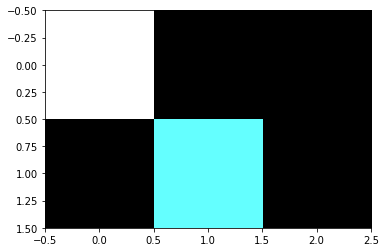

In [ ]:
img = np.array([[[255, 255, 1002], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [100, 255, 255], [0, 0, 0]]])
print(img[0][0][len(img[0][0])-1])
plt.imshow(img)

[[[255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]]

 [[  0   0   0]
  [  0   0   0]
  [255 255 255]]]


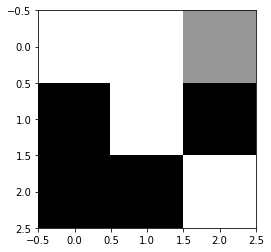

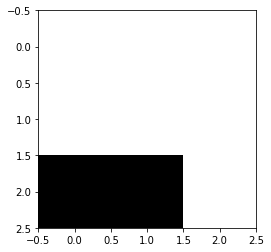

In [ ]:
img = np.array([[255, 255, 150], 
                [0, 255, 0],
                [0, 0, 255]]).astype(np.uint8)

kernel = np.array([[0, 0, 0],
                   [1, 1, 0],
                  [0, 0, 0]])

img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
plt.imshow(img)
plt.figure()
out = cv2.filter2D(img, -1, kernel)
plt.imshow(out)
print(out)

In [ ]:
x = np.linspace(0, 100, 100)
y = [(0.4*i + 3) + np.random.randint(-6, 6) for i in x]

plt.figure(figsize=(10,10))
plt.scatter(x, y)

model = lambda a: [(0.4*i + 3) for i in a]

plt.plot(x, model(x), color="#ff00aa", linewidth=6)

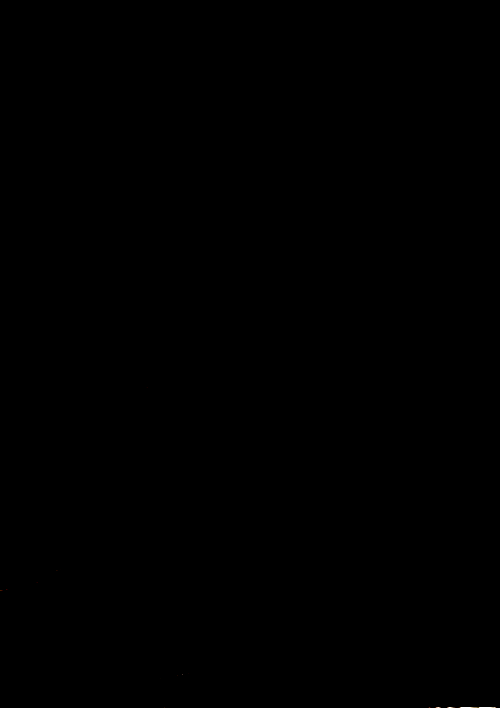

In [ ]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import requests

r = requests.get("https://images.unsplash.com/photo-1479839672679-a46483c0e7c8?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MXx8YXJjaGl0ZWN0dXJlfGVufDB8fDB8fA%3D%3D&auto=format&fit=crop&w=500&q=60")

path = "/content/img.png"
with open(path, 'wb') as f:
    f.write(r.content)

img = cv2.imread(path)

kernelV = np.array([[-.7, 1, -.7],
                   [-.7, 1, -.7],
                   [-.7, 1, -.7]])*200000

kernelA = np.array([[-.7, -.7, -.7],
                   [1, 1, 1],
                   [-.7, -.7, -.7]])*

kernelB = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])*-5

kernelG = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]])*(1/9)

out = cv2.filter2D(img, -1, kernelA)
#cv2_imshow(img)
cv2_imshow(out)

In [ ]:
len([0, 0, 0])

3

In [ ]:
np.linspace(-5168, 100, 1000)

In [ ]:
np.convolve(np.array([0, 1, 2, 32, 6, 7, 2, 4]), np.array([6, 7]))

array([  0,   6,  19, 206, 260,  84,  61,  38,  28])

In [ ]:
def filter(le, filtro):
  out = []
  for i in range(0, len(le)-len(filtro)+1, 1):
    #print(le[i:i+len(filtro)]) #DEBUG
    if le[i:i+len(filtro)]==filtro:
      out.append(1)
    else:
      out.append(0)
  return out

print(filter([0, 1, 2, 32, 6, 7, 2, 4], [32, 6, 7, 2]))

[0, 0, 0, 1, 0]


In [ ]:
le = [0, 1, 2, 3, 4, 2, 2, 4, 7, 9]
filtro = [2, 2]

out = []
for i in range(0, len(le), 1):
  if le[i:i+len(filtro)]==filtro:
    out.append(1)
  else:
    out.append(0)
print(le, filtro, out)

[0, 1, 2, 3, 4, 2, 2, 4, 7, 9] [2, 2] [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


In [ ]:
[2, 2]==[2, 2]

True

In [ ]:
[0, 1, 2][0]

2

In [ ]:
2**16

[[[  0 255   0]
  [100 190 255]]] (1, 2, 3)


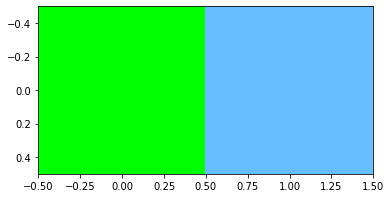

In [ ]:
img = cv2.cvtColor(np.dstack(([0, 255], [255, 190], [0, 100])).astype(np.uint8), cv2.COLOR_BGR2RGB)
print(img, img.shape)
plt.imshow(img)

In [ ]:
np.convolve(np.array([0, 1]), np.array([0.5, 0.5, 0.5, 0.8]))

array([0. , 0.5, 0.5, 0.5, 0.8])

[[[  0 255   0]
  [200 125   2]
  [  0 255 255]
  [255 255   0]]

 [[  0 255   0]
  [200 125   2]
  [ 60  55 200]
  [255 255   0]]

 [[ 60  55 200]
  [200 125   2]
  [  0 255 255]
  [255 255   0]]

 [[  0 255   0]
  [200 125   2]
  [ 60  55 200]
  [255 255   0]]]


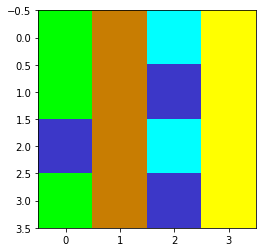

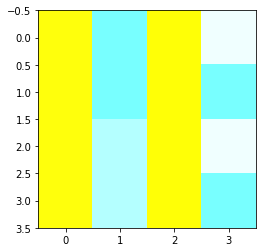

In [ ]:
img = cv2.cvtColor(np.array([[[0, 255, 0], [2, 125, 200], [255, 255, 0], [0, 255, 255]],
                             [[0, 255, 0], [2, 125, 200], [200, 55, 60], [0, 255, 255]],
                             [[200, 55, 60], [2, 125, 200], [255, 255, 0], [0, 255, 255]],
                             [[0, 255, 0], [2, 125, 200], [200, 55, 60], [0, 255, 255]]]).astype(np.uint8), cv2.COLOR_BGR2RGB)

kernel1 = np.array([[1, 0, 1],
                    [1, 0, 1],
                    [1, 0, 1]])

print(img)
plt.imshow(img)
plt.figure()
plt.imshow(cv2.filter2D(img, -1, kernel1))

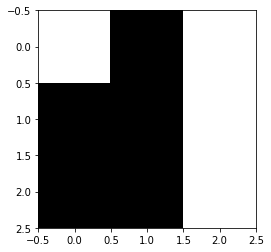

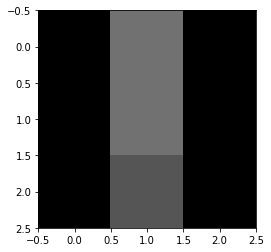

[[[255 255 255]
  [  0   0   0]
  [255 255 255]]

 [[  0   0   0]
  [  0   0   0]
  [255 255 255]]

 [[  0   0   0]
  [  0   0   0]
  [255 255 255]]]


In [ ]:
img = np.array([[255, 0, 255], 
                [0, 0, 255],
                [0, 0, 255]]).astype(np.uint8)

kernel1 = np.array([[0.3]])

kernel2 = np.array([[1, 0, 1], 
                    [1, 0, 1],
                    [1, 0, 1]])*(1/9)

cvImg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
plt.figure()
plt.imshow(cvImg)
plt.figure()
plt.imshow(cv2.filter2D(cvImg, -1, kernel2))
plt.show()
print(cvImg)

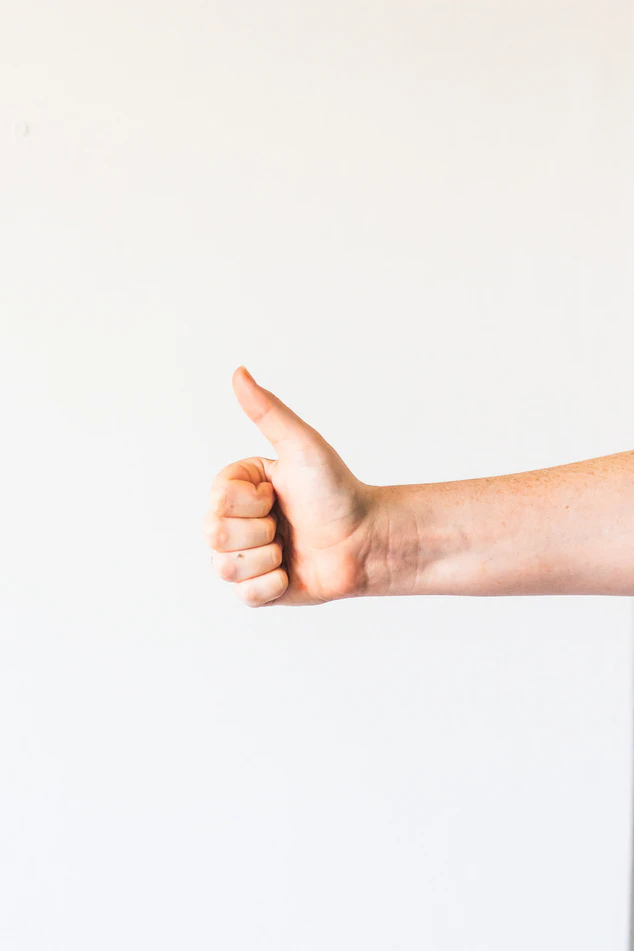

[[1 1 1]
 [1 1 1]
 [1 1 1]] 
Resultado:



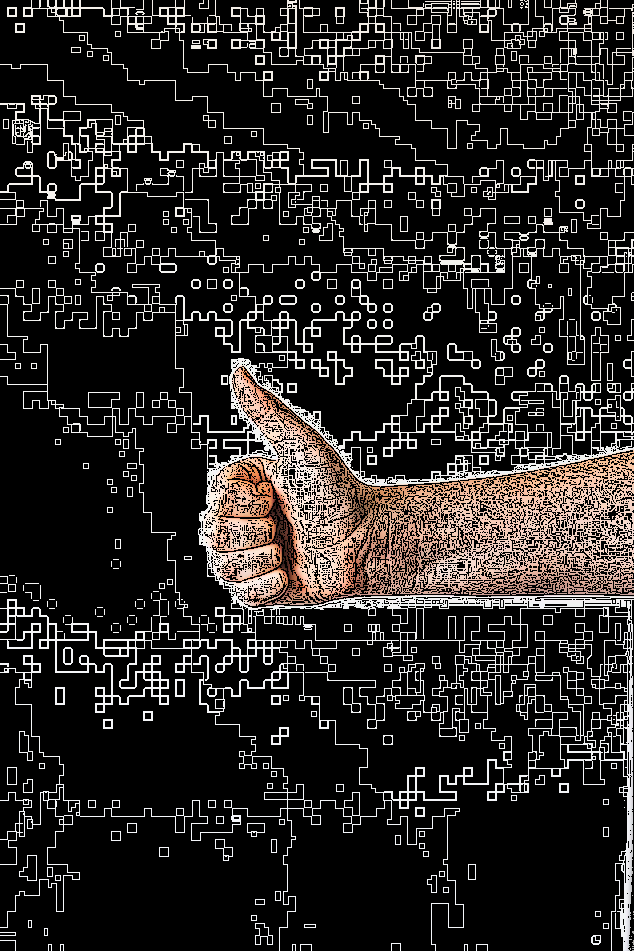

In [ ]:
blurValue = 9
kernelBlur = np.array([[1, 1, 1],
                       [1, 1, 1],
                       [1, 1, 1]])*(1/blurValue)

kernelEdge = np.array([[-1, -1, -1],
        [-1, 8, -1],
        [-1, -1, -1]]*1)

kernelEnhance = np.array([[0, -1, 0],
        [-1, 5, -1],
        [0, -1, 0]]*2)

kernel1 = np.array([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]])

path = "/content/drive/MyDrive/IA_Test_Images/ThumbUp.png" #"/content/drive/MyDrive/IA_Test_Images/NoMask.png"
frame = cv2.imread(path)
#frame = cv2.flip(frame, 1)

frame2 = cv2.filter2D(frame, -1, kernelEdge)
cv2_imshow(frame)
print(kernel1, "\nResultado:\n")
#cv2_imshow(cv2.filter2D(frame2, -1, kernelEnhance))
cv2_imshow(cv2.bitwise_and(frame, frame, mask=cv2.cvtColor(frame2, cv2.COLOR_RGB2GRAY)))
#cv2_imshow(cv2.filter2D(frame, -1, kernelBlur))
#cv2_imshow(cv2.filter2D(frame, -1, kernelEdge))
#cv2_imshow(cv2.filter2D(frame, -1, kernelEnhance))

In [ ]:
!pip install pytesseract
!sudo apt install tesseract-ocr

In [ ]:
import cv2 
import pytesseract

img = cv2.imread('/content/Untitled.png')

# Adding custom options
custom_config = r'-c tessedit_char_whitelist=abcdefghijklmnopqrstuvwxyz --psm 6'
pytesseract.pytesseract.tesseract_cmd = ( r'/usr/bin/tesseract' )
pytesseract.image_to_string(img, config=custom_config)

In [ ]:
https://iesmarianapineda.net/PDF/inicio%202018/Lengua%20castellana/Reflexiones%20sobre%20San%20Manuel%20Bueno%2C_m%C3%A1rtir.pdf

In [ ]:
w = "x+12y-z"
d = {}


temp = ""
for x in range(len(w)):
  if w[x].isalpha():
    d[w[x]] = (float(temp) if temp != "" and temp != "+" and temp != "-" else (1 if temp == "+" or temp == "" else -1))
    temp = ""
  else:
    temp += w[x]

In [ ]:
#@markdown #**Installing libraries**
!pip install spacy==3.1.2

!python -m spacy download es_core_news_lg
!pip install spacytextblob
!pip install spacy-transformers

!pip install whatlies

import os
os.kill(os.getpid(), 9)

In [ ]:
import spacy
#@markdown #**←Pulsa aquí**

import IPython
from google.colab import output
import numpy as np
import IPython
from spacy import displacy
import es_core_news_lg
from whatlies.language import SpacyLanguage
from whatlies import Embedding

nlp = es_core_news_lg.load()
lang = SpacyLanguage(nlp)
doc = None

verbs = True 
adjectives = True 
pronouns = True 
nouns = True

def Concat(a):
  global doc
  doc = nlp(a)
  out = ""

  for s in list(doc.sents):
    for i in s:
      if i.pos_ == "VERB" or i.pos_ == "AUX" and verbs: 
        out += "<abbr title='Verbo " + i.lemma_ + "' style='color:#2186FF; text-decoration: none !important; cursor: no-drop;'><strong>" + i.text.upper() + "</strong></abbr> "
      elif i.pos_ == "ADJ" and adjectives: 
        out += "<abbr title='Adjetivo " + i.lemma_ + "' style='color:#80B829; text-decoration: none !important; cursor: no-drop;'><strong>" + i.text.upper() + "</strong></abbr> "
      elif i.pos_ == "NOUN" and nouns:
        out += "<abbr title='Sustantivo " + i.lemma_ + "' style='color:#D92543; text-decoration: none !important; cursor: no-drop;'><strong>" + i.text.upper() + "</strong></abbr> "
      elif i.pos_ == "ADV" and nouns: 
        out += "<abbr title='Adverbio " + i.lemma_ + "' style='color:#FF6719; text-decoration: none !important; cursor: no-drop;'><strong>" + i.text.upper() + "</strong></abbr> "
      elif i.pos_ == "DET" and nouns: 
        out += "<span style='color:#00FFF0'><strong>" + i.text.upper() + "</strong></span> "
      else:
        out += i.text + " "
    out += "<br>"
  return IPython.display.JSON({'result': out})

def Analyze(a):
  global doc
  doc = nlp(a)
  out = ""
  out = displacy.render(doc, style="dep", options={"compact": True, "bg": "#1f1f1f", "color": "#ffffff", "font": "Gelion Bold"}) 
  out = out[:4] + """ id="analyzed" """ + out[4:]
  out = out.replace("obj", spacy.explain("obj")).replace("conj", spacy.explain("conj")).replace("advcl", spacy.explain("advcl")).replace("cop", spacy.explain("cop")).replace("acl", spacy.explain("acl")).replace("amod", spacy.explain("amod")).replace("det", spacy.explain("det")).replace("nsubj", spacy.explain("nsubj")).replace("mark", spacy.explain("mark")).replace("ccomp", spacy.explain("ccomp")).replace("advmod", spacy.explain("advmod"))
  #print(out)
  return IPython.display.JSON({'result': out})

def Plot(a):
  global doc
  doc = nlp(a)
  out = ""
  
  d = {}
  for i in doc:
    if i.text not in d:
      d[i.text] = 1
    else:
      d[i.text] += 1

  embeddings = lang[[i for i in d.keys()]].assign(col=lambda e: nlp(e.name)[0].pos_ if (nlp(e.name)[0].pos_ in ["ADJ", "VERB", "DET"]) else False)
  embeddings.plot_interactive(x_axis=0, y_axis=1, color="col").properties(height=1400, width=1400).save('chart.html')
  embeddings.plot_similarity().save()
  embeddings.plot_3d(color='red', x_axis=0, y_axis=1).figure=plt.figure(figsize=(20, 20)).save()
  return False

def Semantic(a):
  global doc
  doc = nlp(a)
  out = ""

  for s in list(doc.sents):
    for i in s:
      out += i.lemma_ + " "
    out += "<br>"
  return IPython.display.JSON({'result': out})


output.register_callback('notebook.Concat', Concat)
output.register_callback('notebook.Analyze', Analyze)
output.register_callback('notebook.Semantic', Semantic)
output.register_callback('notebook.Plot', Plot)

IPython.display.HTML("""
<!DOCTYPE html>
<html>

<head>
	</script>
	<script src="https://cdn.jsdelivr.net/npm/bootstrap@5.0.0-beta3/dist/js/bootstrap.bundle.min.js" integrity="sha384-JEW9xMcG8R+pH31jmWH6WWP0WintQrMb4s7ZOdauHnUtxwoG2vI5DkLtS3qm9Ekf"
	 crossorigin="anonymous">

	</script>

	<meta charset="utf-8">
	<meta name="viewport" content="width=device-width">
	<title>Spacy</title>
	<link href="https://cdn.jsdelivr.net/npm/bootstrap@5.0.0-beta3/dist/css/bootstrap.min.css" rel="stylesheet" integrity="sha384-eOJMYsd53ii+scO/bJGFsiCZc+5NDVN2yr8+0RDqr0Ql0h+rP48ckxlpbzKgwra6"
	 crossorigin="anonymous">
	<script src="https://cdn.jsdelivr.net/npm/bootstrap@5.0.0-beta3/dist/js/bootstrap.bundle.min.js" integrity="sha384-JEW9xMcG8R+pH31jmWH6WWP0WintQrMb4s7ZOdauHnUtxwoG2vI5DkLtS3qm9Ekf"
	 crossorigin="anonymous">

	</script>
  <style>
  .white-color {
  color:#ffffff;
}

.dark-color {
  color:#181818;
}

.responsive-width {
  min-width: 50rem;
}

.responsive-height {
  min-height:67.5rem;
}

abbr {
  cursor: no-drop;
  position: relative
}

abbr:hover::after {
  background: #333333;
  color: #ffffff;
  cursor: no-drop;
  border-radius: 0px;
  bottom: 100%;
  content: attr(title);
  display: block;
  left: 100%;
  padding: 1em;
  position: absolute;    
  width: 280px;
  z-index: 1;
}

@media (max-width:960px) { 
  .useless-div{
  width:100%;
  height:56.25vh;
}
} 

@media (min-width:960px) { 
  .useless-div{
  width:100%;
  height:56.25vw;
}
}

@media screen and (max-width: 1560px) {
  .column {
    width: 100%;
  }
}
  </style>
</head>

<body id="bd" style="background-color:#ffffff;overflow-x: hidden">
  <script src="https://ajax.googleapis.com/ajax/libs/jquery/2.1.1/jquery.min.js"></script>
	<script>
    document.getElementById("b1").onclick = function () {
    (async function() {
  const result = await google.colab.kernel.invokeFunction(
    'notebook.Concat', // The callback name.
    [document.getElementById("textArea").value], // The arguments.
    {}); // kwargs
  const text = result.data['application/json'].result;
  document.getElementById("morph").innerHTML = text;
})();
    };  

    document.getElementById("b2").onclick = function () {
    (async function() {
  const result = await google.colab.kernel.invokeFunction(
    'notebook.Analyze', // The callback name.
    [document.getElementById("textArea").value], // The arguments.
    {}); // kwargs
  const text = result.data['application/json'].result;
  var parent = document.getElementById("mainDiv");
  while (parent.firstChild) {
    parent.removeChild(parent.firstChild);
  }
  document.getElementById("mainDiv").innerHTML = text;
})();
    }; 

    document.getElementById("b3").onclick = function () {
    (async function() {
  const result = await google.colab.kernel.invokeFunction(
    'notebook.Semantic', // The callback name.
    [document.getElementById("textArea").value], // The arguments.
    {}); // kwargs
  const text = result.data['application/json'].result;
  document.getElementById("sem").innerHTML = text;
})();
    }; 
  
  </script>


  <textarea contenteditable="true" style="min-height: 25rem; margin: 2rem; border: none; background: #ffffff none repeat scroll 0% 0%; display: inherit; font-family: inherit; font-size: inherit; font-style: inherit; font-weight: inherit; letter-spacing: inherit; line-height: inherit; tab-size: inherit; text-indent: inherit; white-space: pre-wrap; word-break: keep-all; overflow-wrap: break-word; height: 100%; width: 100%; resize: none; padding: 0.9rem; outline: solid 4px #1f1f1f;" id="textArea" autocapitalize="none" autocomplete="off" autocorrect="off" spellcheck="false" data-gramm="false">Ningún gran descubrimiento se ha conseguido sin haber hecho antes una audaz suposición.</textarea>
  
  <button id="b1" type="button" class="btn btn-lg rounded-5"  style="margin: 2rem;background-color:#48e073;color:#ffffff" onclick=""><strong>Morfología</strong></button>
  <button id="b3" type="button" class="btn btn-lg rounded-5"  style="margin: 2rem;background-color:#48e073;color:#ffffff" onclick=""><strong>Semántica</strong></button>
  <button id="b2" type="button" class="btn btn-lg rounded-5"  style="margin: 2rem;background-color:#48e073;color:#ffffff" onclick=""><strong>Sintaxis</strong></button>  
  <button id="b4" type="button" class="btn btn-lg rounded-5"  style="margin: 2rem;background-color:#48e073;color:#ffffff" onclick=""><strong>Plot</strong></button>

  <div style="margin: 2rem; padding-bottom:-9rem; background-color: #1f1f1f">
    <p id="morph" style="margin-left: 0.9rem; color: #ffffff"></p> 
  </div>  

  <div style="margin: 2rem; padding-bottom:-9rem; background-color: #1f1f1f">
    <p id="sem" style="margin-left: 0.9rem; color: #ffffff"></p> 
  </div>  

  <div id="mainDiv" style="margin: 2rem; background-color: #1f1f1f">
    
  </div>   
</body>

</html>""")

In [ ]:
with open("/content/chart.html", "r", encoding='utf-8') as f:
    text= f.read()
IPython.display.HTML(text)

In [ ]:
IPython.display.HTML(displacy.render(doc, style="ent", options={"compact": True, "bg": "#1f1f1f", "color": "#ffffff", "font": "Gelion Bold"}) )

In [ ]:
vector = nlp("manzana")[0].vector

ms = nlp.vocab.vectors.most_similar(vector.reshape(1, vector.shape[0]), n=90)
words = [nlp.vocab.strings[w] for w in ms[0][0]]
print(words)

In [ ]:
print(nlp.vocab.length)

In [ ]:
import nltk
from nltk.stem.snowball import SnowballStemmer

print(SnowballStemmer(language='spanish').stem(""))

##**Recursos y ejemplos**

https://www.hackerrank.com/ <br>
https://www.dailycodingproblem.com/ <br>
https://www.sololearn.com<br>
https://stackoverflow.com/<br>
https://www.geeksforgeeks.org/<br>
https://www.youtube.com/channel/UC8butISFwT-Wl7EV0hUK0BQ<br>
https://www.youtube.com/c/3blue1brown<br>
https://www.youtube.com/c/khanacademy<br>
https://www.youtube.com/channel/UCKXx22vOENUyHrVAADq7Z_g<br>
https://www.youtube.com/channel/UCxX9wt5FWQUAAz4UrysqK9A<br>
https://www.youtube.com/channel/UCaO6VoaYJv4kS-TQO_M-N_g<br>
https://www.youtube.com/channel/UClfn4HKvodl8v8-1hhroI5g<br>
https://www.youtube.com/c/MyCS1<br>
https://www.youtube.com/channel/UCwM4EI8mqvsSUR7Ou1D0qrA<br>
**Cursos gratis del MIT** **https://www.youtube.com/c/mitocw/playlists** <br>
**Perfil de Github con código** https://github.com/cardstdani<br>

In [ ]:
@echo off
:inicio

set a=500
set b=600

set /a r =a*b
echo %r%


if 1 == 0 (SI) else (echo NO)

for /L %%A in (1,1,3) do (
  ECHO %%A
  ::start.
  ::md Carpeta%%A
)

::pause

In [ ]:
!pip install cryptography

In [ ]:
!nvidia-smi

In [ ]:
#FACTORIAL
num = int(input())
fac = 1

for i in range(1, num + 1):
  print(fac, i)
  fac *= i

print("El factorial de", num, "es", fac)

In [ ]:
#Coche

#Atributos
 #V. Max
 #Potencia
 #N. asientos

#Funciones
 #Alante
 #Atras
 #Girar

In [ ]:
class Coche:
  def __init__(self, a, b, c, d, e=90):
    self.asientos = a
    self.potencia = b
    self.vmax = c
    self.matricula = d
    self.anguloRuedas = e
  
  def girar(self):
    self.anguloRuedas += 1
    return self.vmax

var = Coche(90, 9999999999, 500**1000, "wb")
print(var.girar())

In [ ]:
#Tabla Verdad

#Atributos
  #Número de variables
  #Función a aplicar (formato lambda)

#Funciones
  #__str__ para escribir la tabla de verdad en la consola

In [ ]:
"jksbdkjsb"

In [ ]:
def sumar(a, b):
  return (a+b)
sumar(1, 1)

In [ ]:
sumar = lambda a, b : a and b or not a
print(sumar(1, 1))

In [ ]:
class tablaVerdad:
  def __init__(self, n, f):
    self.variables = n
    self.function = f
  
  def __str__(self):
    out = ""
    for i in range(2**self.variables):
      temp = bin(i)[2:]
      temp = "0"*(self.variables-len(temp)) + temp
      b = [int(i) for i in temp]
      out += f"{str(b)}{self.function(b)} \n"
    return out

tv = tablaVerdad(2, lambda l : l[0] and l[1])
print(tv)

In [ ]:
"I"*20

In [ ]:
"1" "01" "00000000000000001"

In [ ]:
class a:
  def __init__(self, b):
    self.b = b
  
  def __str__(self):
    return str(self.b)

ch = a(8)
print(ch)

In [ ]:
import matplotlib.pyplot as plt
from timeit import default_timer as timer

def function1(n):
  r = 0
  for i in n:
    r += i
  return r

def function2(n):
  r = 0
  for i in n:
    for a in range(len(n)):
      r+=1
    r += i
  return r

x = []
y = []

for i in range(2, 22, 1):
  array = range(i)
  t = timer()
  
  a = tablaVerdad(i, lambda l : l[0] and l[1])
  print(a)

  y.append(timer()-t)
  x.append(i)

plt.plot(x, y)
plt.show()

In [ ]:
[int(i) for i in f'{x:0{n_bits}b}']

In [ ]:
a, b = 0, 1
n = 8

for i in range(n-2):
  c = a+b
  a, b = b, c
  print(c, a,  b)

In [ ]:
i = 0
while i < 9:
  print(i)
  i += 1

In [ ]:
a = int(input())

if a%2 == 0:
  print("El numero", a, "es par")
else:
  print("El numero {} no es par".format(a))

In [ ]:
# Obtener coeficientes
# Rango de A y A*
# Saber si es un sistema SCD

In [ ]:
import numpy as np

rankA = np.linalg.matrix_rank(a)
rankA2 = np.linalg.matrix_rank(a2)
unknown = len(d.keys())

if rankA == rankA2 == unknown:
  detA = np.linalg.det(a)
  for i in range(unknown): # Por cada incognita
    solution = np.matrix(a)    
    solution[:, i] = c
    print(unknown, "=", np.linalg.det(solution) / detA)

In [ ]:
rankA = np.linalg.matrix_rank(a)
rankA2 = np.linalg.matrix_rank(a2)
unknown = len(d.keys())

if rankA == rankA2 == unknown:
  detA = np.linalg.det(a)
  for i in range(len(d.keys())):
    solution = np.matrix(a)    
    solution[:, i] = c
    print(list(d.keys())[i], "=", np.linalg.det(solution) / detA)

In [ ]:
import numpy as np

s2 = """x-y+2z=-4
3x-5y+8z=-14
x+3y-2z=0"""

s = """3x+2y+z=1
5x+3y+4z=2
x+y-z=1"""

a = []
a2 = []
d = {}
c = []

var = ""
for y in s:
  if y.isalpha():
    var += y
  else:
    if var != "":
      d[var] = []
      var = ""

for i in s.split("\n"):
  spl = i.split("=")
  c.append(float(spl[1]))
  
  w = spl[0]
  temp = ""
  vars = list(d.keys())
  for x in range(len(w)):
    if w[x].isalpha():
      if w[x] in vars:
        d[w[x]].append(float(temp) if temp != "" and temp != "+" and temp != "-" else (1.0 if temp == "+" or temp == "" else -1.0))
        vars.remove(w[x])
      else:
        d[w[x]][len(d[w[x]])-1] += (float(temp) if temp != "" and temp != "+" and temp != "-" else (1.0 if temp == "+" or temp == "" else -1.0))        
      temp = ""
    else:
      temp += w[x]
  for y in vars:
    d[y].append(0.0)

for i in d.values():
  a.append(i)
  a2.append(i)

a2.append(c)
a = np.matrix(a, dtype=np.float).T
a2 = np.matrix(a2, dtype=np.float).T
c = np.matrix(c).reshape(-1, 1)

print(d)
print(a)
print(a2)

rankA = np.linalg.matrix_rank(a)
rankA2 = np.linalg.matrix_rank(a2)
unknown = len(d.keys())

if rankA == rankA2 == unknown:
  detA = np.linalg.det(a)
  for i in range(len(d.keys())):
    solution = np.matrix(a)    
    solution[:, i] = c 
    print(list(d.keys())[i], "=", np.linalg.det(solution) / detA)

##**Spacy**

https://applied-language-technology.readthedocs.io
<br>https://spacy.io/usage/linguistic-features
<br>https://www.vertex42.com/ExcelTips/unicode-symbols.html

In [ ]:
#@markdown #**Installing libraries**
!pip install spacy==3.2.0

!python -m spacy download es_core_news_lg
#!python -m spacy download es_dep_news_trf
!pip install spacy-transformers

!pip install whatlies
import os
os.kill(os.getpid(), 9)

In [ ]:
import spacy
print(spacy.__version__)

import numpy as np
import IPython
from spacy import displacy
import es_core_news_lg

nlp = es_core_news_lg.load()

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
wc = WordCloud(background_color="white", 
               max_words=350, 
               width=1000, 
               height=600, 
               random_state=1).generate(p.text)

plt.figure(figsize=(15,15))
plt.imshow(wc)
plt.axis("off")
a = plt.savefig('foo.png')
print(type(a))

In [ ]:
class MorphAnalysis():
  def __init__(self, w):
    self.word = w.lower()

    doc = nlp(self.word)
    self.data = doc[0].morph
    self.type = doc[0].pos_
    self.pre = {"a" : "", "an" : "", "ante" : "", "anti" : "", "bi" : "", "com" : "", "con" : "", "co" : "", "contra" : "", "des" : "", "dis" : "", "en" : "", "entre" : "", "entro" : "", "intro" : ""}
    self.suf = {"a" : "", "able" : "", "ación" : "", "adera" : "", "adero" : "", "idero" : "", "edero" : "", "adizo" : "", "idizo" : "", "edizo" : "", "ado" : "", "ador" : "", "edor" : "", "idor" : "", "ante" : ""}
  
  def analyze(self):
    out = ""
    word = self.word

    if self.type == "DET":
      if self.data.get("PronType")[0] == "Art":
        if self.data.get("Definite")[0] == "Ind":
          print("Artículo indeterminado")
        else:
          print("Artículo determinado")

      if self.data.get("PronType")[0] == "Dem":

    if self.type == "NOUN":
      prefix = ""
      for i in self.pre.keys():
        if word.startswith(i):
          if len(i) > len(prefix):
            prefix = i      
      word = word[len(prefix):]
      if self.data.get("Number") == "Plur":
        if word[-1] == "s":
          word = word[:-1]
        elif word[-2] == "es":
          word = word[:-2]      


    out = word
    return out

  
a = MorphAnalysis("este")
print(a.analyze())
print(a.word, a.data, a.type)

In [ ]:
spacy.explain("PROP")

In [ ]:
param = [0]*16
param[0] = len(list(p.sents))
t = {"NOUN" : 4, "PRON" : 5, "ADJ" : 6, "ADV" : 7, "DET" : 8, "ADP" : 9, "VERB" : 10, "AUX" : 11, "PUNCT" : 12, "CCONJ" : 13}

for i in p:
  param[1] += 1
  if not i.is_punct:
    param[2] += 1
  else:
    param[3] += 1
  print(i, i.morph)
  param[t[i.tag_]] += 1

param[14] = len(p.text) - p.text.count(" ")
param[15] = p.text.count(" ")
print(p.text)
print(param)

In [ ]:
#@markdown #**Input Parameters**
text = "Ning\xFAn gran descubrimiento se ha conseguido sin haber hecho antes una audaz suposici\xF3n." #@param {type:"string"}
p = nlp(text)

In [ ]:
for i in p:
  print(i, "Root" if i.text == i.sent.root.text else "")

In [ ]:
for i in p:
  print(i, i.morph, i.pos_)

In [ ]:
#@markdown #**Sintaxis**
for token in p:
    print (token.text, "\t", token.pos_, "\t", token.dep_, "\t", token.morph)

compact = False #@param {type:"boolean"}
backgroundColor = "#1f1f1f" #@param {type:"string"}
fontColor = "#ffffff" #@param {type:"string"}
font = "Gelion Bold" #@param {type:"string"}

IPython.display.HTML(displacy.render(p, style="dep", options={"compact": compact, "bg": backgroundColor, "color": fontColor, "font": font}).replace("fixed", spacy.explain("fixed")))

In [ ]:
#@markdown #**Espacio Vectorial**
from whatlies.language import SpacyLanguage
from whatlies import Embedding

lang = SpacyLanguage(nlp)

d = {}

for i in p:
  if i.text not in d:
    d[i.text] = 1
  else:
    d[i.text] += 1

for key, value in d.items():
    print(key, ': ', value)

embeddings = lang[[i for i in d.keys()]].assign(col=lambda e: nlp(e.name)[0].pos_ if (nlp(e.name)[0].pos_ in ["ADJ", "VERB", "DET"]) else False)
print(lang.score_similar(lang['doctor'], prob_limit=-20))

In [ ]:
vector = nlp("Datos")[0].vector
ms = nlp.vocab.vectors.most_similar(vector.reshape(1, vector.shape[0]), n=100)
words = [nlp.vocab.strings[w] for w in ms[0][0]]
print(words)

In [ ]:
print(embeddings.plot_interactive(x_axis=0, y_axis=1, color="col").properties(height=800, width=800).to_html())

In [ ]:
embeddings.plot_brush(n_show=20, color="col")#.properties(height=1400, width=1400)

In [ ]:
embeddings.plot(color='red', x_axis=0, y_axis=1).figure=plt.figure(figsize=(20, 20))

In [ ]:
embeddings.plot_3d(color='red', x_axis=0, y_axis=1).figure=plt.figure(figsize=(20, 20))

In [ ]:
import base64, io

fig = plt.figure(figsize=(8, 8))
embeddings.plot_similarity().save()
plt.plot()

In [ ]:
import matplotlib.pyplot as plt

labels = []
matrix = []
for i in p:
  labels.append(i.text)
  matrix.append([])
  for j in p:
    matrix[len(matrix)-1].append(i.similarity(j))

fig, ax = plt.subplots(figsize=(20,20))
cax = ax.matshow(matrix, interpolation='nearest')
ax.grid(True)
plt.title('Matriz de similitud')
length = len(p)
plt.xticks(range(length), labels, rotation=90)
plt.yticks(range(length), labels)
#fig.colorbar(cax, ticks=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, .75,.8,.85,.90,.95,1])
plt.show()

from matplotlib import cm as cm
 
cmap = cm.get_cmap('Greens')
cmap = cm.get_cmap('YlGnBu')
cmap = cm.get_cmap('RdYlGn')
 
#cax = ax.matshow(matrix, interpolation='nearest', cmap=cmap)

In [ ]:
for i in p:
  for j in p:
    print(i.similarity(j))
  print()

In [ ]:
embeddings.plot_interactive_matrix()

In [ ]:
embeddings.plot_pixels()

In [ ]:
for ent in p.ents:
    print(ent.text, ent.label_)

IPython.display.HTML(displacy.render(p, style="ent"))

In [ ]:
from spacy.matcher import Matcher
matcher = Matcher(vocab=nlp.vocab)
matcher.add("Auxiliares", patterns=[[{'POS': 'AUX'}, {'POS': 'VERB'}]])
matcher.add("Adjetivos", patterns=[[{'POS': 'ADJ'}]])
matcher.add("Verbos", patterns=[[{'POS': 'VERB'}]])

result = matcher(p2, as_spans=True)
print(result)
for r in result:
    if nlp.vocab[r.label].text == "Verbos": print(nlp.vocab[r.label].text, '\t', r)

In [ ]:
from termcolor import colored

verbs = True #@param {type:"boolean"}
adjectives = True #@param {type:"boolean"}
pronouns = False #@param {type:"boolean"}
nouns = False #@param {type:"boolean"}

for s in list(p.sents):
  for i in s:
    if i.pos_ == "VERB" and verbs: 
      print(colored(i.text.upper(), 'yellow'), end=" ")
    elif i.pos_ == "ADJ" and adjectives: 
      print(colored(i.text.upper(), 'green'), end=" ")
    elif i.pos_ == "PROPN" and pronouns: 
      print(colored(i.text.upper(), 'grey'), end=" ")
    elif i.pos_ == "NOUN" and nouns: 
      print(colored(i.text.upper(), 'blue'), end=" ")
      #print('\033[34m' + i.text.upper(), end=" ")
    else:
      print(i, end=" ")
  print()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def get_vector(text):
    doc = nlp(text)
    return doc.vector

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

def plot_3d(text):
    global fig
    global ax
    vector = get_vector(text)
    x = vector[0]
    y = vector[1]
    z = vector[2]
    ax.scatter(x, y, z)
    ax.text(x, y, z, text)

for i in p:
  print(i.text)
  plot_3d(i.text)
plt.show()

In [ ]:
print(spacy.explain('nsubj'))
print(spacy.explain('mark'))

In [ ]:
a = 128169
b = chr(a).encode('utf-8')


for i in b:
    print(bin(i))

In [ ]:
a = 128169
ap = 128579
print(chr(a))
b = chr(a).encode('utf-8')
c = chr(a).encode('utf-16')

for i in b:
    print(bin(i))

print("\n")
for i in c:
    print(bin(i))

In [ ]:
from cryptography.fernet import Fernet
import base64

message = "Hello world!"
print(message, message.encode())

key = Fernet.generate_key()
print(key)

key = base64.b64encode(("a"*32).encode())
print(key)

token = Fernet(key).encrypt(message.encode())
print("Encrypted: " + str(token))

print("Decrypted: " + str(Fernet(key).decrypt(token)))

In [ ]:
from cryptography.fernet import Fernet
import base64

inFile = open("/content/drive/MyDrive/IA_Test_Images/FingerUp.png", "rb")
data = inFile.read()
inFile.close()
print(data)

#key = Fernet.generate_key()
#print(key)

key = base64.b64encode("aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa".encode())
print(key)

f = Fernet(key)
encryptedBytes = f.encrypt(data)
print("Encriptado: " + str(token))

with open ("/content/drive/MyDrive/IA_Test_Images/PhotoEncrypted.png", 'wb') as encryptedFile:
    encryptedFile.write(encryptedBytes)

decryptedBytes = f.decrypt(encryptedBytes)
print("Desencriptado: " + str(decryptedBytes))

with open ("/content/drive/MyDrive/IA_Test_Images/Photo.png", 'wb') as encryptedFile:
    encryptedFile.write(decryptedBytes)

In [ ]:
import socket
import random

sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
bytes = random._urandom(1000)

ip = input("Enter IP: ")
port = 1

sent = 0
while True:
    sock.sendto(bytes, (ip, port))
    sent = sent + 1
    port = port + 1
    print("Sent %s packet to %s throught port:%s" % (sent, ip, port))
    if port == 65534:
        port = 1

In [ ]:
class obj():
  def __init__(self, id, m, x, y):
    self.id = id
    self.m = m
    self.x = x
    self.y = y

def w(m1, m2, r):
  return (-6.67*10**-11 * ((m1*m2) / r))

def ep(g):
  e = 0

  for i in g.keys():
    for a in g[i]:
      if i in g[a]:   
        g[a].remove(i)                           
        d = ((i.x - a.x)**2 + (i.y - a.y)**2)**0.5
        epw = w(i.m, a.m, d)
        print("m {} {} = {}".format(i.id, a.id, epw))
        e += epw        
  return e

#m, x, y
data = [obj(0, 1, 0, 0), obj(1, 2, 0, 0.2), obj(2, 3, 0.2, 0.2), obj(3, 2, 0.2, 0)]
graph = {}

for i in data:
  for a in data:
    if not a == i:
      if i in graph:
        graph[i].append(a)
      else:
        graph[i] = [a]
        
print(ep(graph))

In [ ]:
import cv2
import mediapipe as mp
import time
import os, sys

cap = cv2.VideoCapture("http://192.168.1.220:4747/video")
fps = 1
prev = 0

m = mp.solutions.hands.Hands()


def restart():
    cap.release()
    time.sleep(1)
    os.startfile(__file__)
    sys.exit()


while True:
    elapsedTime = time.time() - prev
    success, img = cap.read()

    if success:
        if elapsedTime > 1. / fps:
            fps = 1
            prev = time.time()
            imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            results = m.process(imgRGB)

            if results.multi_hand_landmarks:
                print("1")
                fps = 0.2
                print("Start")
                time.sleep(1)
                print("end")
            else:
                print(0)

In [ ]:
import tensorflow as tf
import numpy as np
import IPython.display as display
from google.colab.patches import cv2_imshow
import PIL.Image
import random
import cv2
import urllib

url = "https://images.unsplash.com/photo-1632188733972-0b12f9901e47?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1170&q=80"
urllib.request.urlretrieve(url, 'IMG.jpg')

def deprocess(img):
    img = 255 * (img + 1.0) / 2.0
    return tf.cast(img, tf.uint8)

!nvidia-smi
original_img = np.array(PIL.Image.open('/content/IMG.jpg'))
base_model = tf.keras.applications.VGG16(include_top=False, weights='imagenet')
layer_names = [layer.name for layer in base_model.layers]
l = len(layer_names)

# Maximize the activations of these layers
#names = random.sample(layer_names, 6)
names = [layer_names[40%l], layer_names[63%l], layer_names[86%l], layer_names[100%l], layer_names[164%l]]
layers = [base_model.get_layer(name).output for name in names]
dream_model = tf.keras.Model(inputs=base_model.input, outputs=layers)


def calc_loss(img, model):
    img_batch = tf.expand_dims(img, axis=0)
    layer_activations = model(img_batch)
    if len(layer_activations) == 1:
        layer_activations = [layer_activations]

    losses = []
    for act in layer_activations:
        loss = tf.math.reduce_mean(act)
        losses.append(loss)

    return tf.reduce_sum(losses)


class DeepDream(tf.Module):
    def __init__(self, model):
        self.model = model

    @tf.function(
        input_signature=(
                tf.TensorSpec(shape=[None, None, 3], dtype=tf.float32),
                tf.TensorSpec(shape=[], dtype=tf.int32),
                tf.TensorSpec(shape=[], dtype=tf.float32),)
    )
    def __call__(self, img, steps, step_size):
        print("Tracing")
        loss = tf.constant(0.0)
        for n in tf.range(steps):
            with tf.GradientTape() as tape:
                tape.watch(img)
                loss = calc_loss(img, self.model)

            gradients = tape.gradient(loss, img)
            gradients /= tf.math.reduce_std(gradients) + 1e-8
            img = img + gradients * step_size
            img = tf.clip_by_value(img, -1, 1)

        return loss, img


deepdream = DeepDream(dream_model)


def run_deep_dream_simple(img, steps=100, step_size=0.01):
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    img = tf.convert_to_tensor(img)
    step_size = tf.convert_to_tensor(step_size)
    steps_remaining = steps
    step = 0
    while steps_remaining:
        if steps_remaining > 100:
            run_steps = tf.constant(100)
        else:
            run_steps = tf.constant(steps_remaining)
        steps_remaining -= run_steps
        step += run_steps

        loss, img = deepdream(img, run_steps, tf.constant(step_size))

        display.clear_output(wait=True)
        print("Step {}, loss {}".format(step, loss))

    result = deprocess(img)
    display.clear_output(wait=True)

    return result

def random_roll(img, maxroll):
    shift = tf.random.uniform(shape=[2], minval=-maxroll, maxval=maxroll, dtype=tf.int32)
    img_rolled = tf.roll(img, shift=shift, axis=[0, 1])
    return shift, img_rolled


class TiledGradients(tf.Module):
    def __init__(self, model):
        self.model = model

    @tf.function(
        input_signature=(
                tf.TensorSpec(shape=[None, None, 3], dtype=tf.float32),
                tf.TensorSpec(shape=[], dtype=tf.int32),)
    )
    def __call__(self, img, tile_size=512):
        shift, img_rolled = random_roll(img, tile_size)
        gradients = tf.zeros_like(img_rolled)
        xs = tf.range(0, img_rolled.shape[0], tile_size)[:-1]
        if not tf.cast(len(xs), bool):
            xs = tf.constant([0])
        ys = tf.range(0, img_rolled.shape[1], tile_size)[:-1]
        if not tf.cast(len(ys), bool):
            ys = tf.constant([0])

        for x in xs:
            for y in ys:
                with tf.GradientTape() as tape:
                    tape.watch(img_rolled)

                    # Extract a tile out of the image.
                    img_tile = img_rolled[x:x + tile_size, y:y + tile_size]
                    loss = calc_loss(img_tile, self.model)

                gradients = gradients + tape.gradient(loss, img_rolled)

        gradients = tf.roll(gradients, shift=-shift, axis=[0, 1])
        gradients /= tf.math.reduce_std(gradients) + 1e-8

        return gradients


get_tiled_gradients = TiledGradients(dream_model)

img = tf.constant(np.array(original_img))
base_shape = tf.shape(img)[:-1]


def run_deep_dream_with_octaves(img, steps_per_octave=100, step_size=0.01,
                                octaves=range(-2, 3), octave_scale=1.3):
    base_shape = tf.shape(img)
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = tf.keras.applications.inception_v3.preprocess_input(img)

    initial_shape = img.shape[:-1]
    img = tf.image.resize(img, initial_shape)
    for octave in octaves:
        new_size = tf.cast(tf.convert_to_tensor(base_shape[:-1]), tf.float32) * (octave_scale ** octave)
        img = tf.image.resize(img, tf.cast(new_size, tf.int32))

        for step in range(steps_per_octave):
            gradients = get_tiled_gradients(img)
            img = img + gradients * step_size
            img = tf.clip_by_value(img, -1, 1)

            if step % 2 == 0:
                display.clear_output(wait=True)
                print("Octave {}, Step {}".format(octave, step))

    result = deprocess(img)
    return result


img = run_deep_dream_with_octaves(img=original_img, steps_per_octave=20, step_size=0.01,octaves=range(0, 6), octave_scale=0.8)
img = tf.image.resize(img, base_shape)
img = tf.image.convert_image_dtype(img / 255.0, dtype=tf.uint8)
cv2_imshow(cv2.cvtColor(original_img, cv2.COLOR_RGB2BGR))
cv2_imshow(cv2.cvtColor(img.numpy(), cv2.COLOR_RGB2BGR))

#dream_img = run_deep_dream_simple(img=original_img, steps=30, step_size=0.01)
#cv2.imshow("image", cv2.cvtColor(dream_img.numpy(), cv2.COLOR_BGR2RGB))
print(layer_names)
print(layer_names.index("mixed0"))
print(layer_names.index("mixed1"))
print(layer_names.index("mixed2"))
print(layer_names.index("mixed3"))
print(names)

##**Operaciones y comentarios**

In [ ]:
print(1)

In [ ]:
print(1+1)
print(20-10)
print(2*10)

In [ ]:
#Esta línea no se ejecuta: print(1+1)
print(1/1) #Esta línea sí se ejecuta

In [ ]:
print(7/9)
print(int(7/9))
print(round(7/9))

In [ ]:
print(round(1.2))
print(round(1.5))
print(round(1.9))

In [ ]:
print(3**2)

In [ ]:
print(3**3**3**2)

In [ ]:
print(4**0.5)
print((1 + 5**0.5) / 2)

In [ ]:
"{0:.70f}".format((1 + 5**0.5) / 2)

In [ ]:
import math

print(math.sin(1))
print(math.sin(0))
print(math.cos(math.radians(1)))
print(math.cos(0))

##**Variables**

In [ ]:
a = 1
b = 1.0
c = True
d = "Texto"

In [ ]:
print("Hello world!")

In [ ]:
print("Hello world! " + str(1))

In [ ]:
print("Hello world! \n" + str(1))

In [ ]:
print(a)
print(b)
print(c)
print(d)

In [ ]:
print(str(a) + str(b) + str(c) + str(d))

In [ ]:
print("{} {} {} {}".format(a, b, c, d))

##**Condicionales, funciones y puertas lógicas (AND, NOT, OR, XOR, XNOR, NOR, NAND)**

In [ ]:
if 1 == 1:
  print("Hello world!")

In [ ]:
if 2 == 1:
  print("world!")
else:
  print("Hello")

In [ ]:
if 2 < 1:
  print("world!")
elif not 1 >= 1:
  print("Hello")

print("Exit")

In [ ]:
if 4 >= 3 or 1 == 1: # Comentario
  print("A")

In [ ]:
if 0 == 0 and None == None and not 1 or 0:
  print("Hello")
elif not 1 and 0:
  print("world")
elif True and not False:
  print("!")

In [ ]:
print(1 == True)
print(0 == False)

print(0 == None)
print(None == None)

In [ ]:
if 1 != 2:
  print("1 == {}".format(1))

In [ ]:
def function(x):
  return (3 * x) + 1

print(function(2))

In [ ]:
def f(a, b):
  return a+b

def fib(n, mem={}):
  if n in mem:
    return mem[n]

  if n <= 1:
    return 1
    
  mem[n] = fib(n-1, mem) + fib(n-2, mem)
  return mem[n]

print(fib(0))
print(fib(1))
print(fib(2))
print(fib(3))
print(fib(4))
print(fib(50))

In [ ]:
def NOT(a):
    return not a

def AND (a, b):
    return a and b

def OR(a, b):
    return a or b

def XOR (a, b):
    return a^b

def XNOR (a, b):
    return not a^b

def NAND (a, b):
    return not (a and b)

def NOR(a, b):
    return not (a or b)      

##**Bucles For y While**

In [ ]:
#Función range
print(range(10))
print(list(range(10)))

In [ ]:
print(list(range(0, 20, 2)))

In [ ]:
for i in range(10):
  print(i)

In [ ]:
for i in range(0, 50, 5):
  print(i)

In [ ]:
i = 0
while i < 10:
  print(i)
  i += 1

In [ ]:
while True:
  a = 1

In [ ]:
i = 0
while i > -1:
  i += 1
  print(i)

##**Listas dinámicas (enlazadas)**

In [ ]:
a = [0, 1, 3, 567, 123, 912]
print(a)
print(len(a))

print("\n")
print(a[0])
print(a[1])
print(a[2])

In [ ]:
for i in a:
  print(i)

In [ ]:
for i in range(len(a)):
  print(a[i])

In [ ]:
# Estructura try catch

try:
  print(a[len(a)])
except:
  print("Error")

In [ ]:
try:
  print(a[len(a)])
except NameError:
  print("Name error")
except IndexError:
  print("Index error")
except:
  print("Error fatal")

In [ ]:
b = [[1, 0, 0], 
     [0, 1, 0],
     [0, 0, 1]]

print(b)

In [ ]:
try:
  print(b[0][0])
  print(b[0])
except IndexError:
  print("Index error")

In [ ]:
print(b[2] + b[1])

In [ ]:
lst = [0, 1, 2]
lst.append(3)
lst.extend([4, 5, 6])

lst += [850]
print(lst)

In [ ]:
np.random.randint(-3, 3,(7, 7))

In [ ]:
class matrix():
  def __init__(self, m=None):
    self.m = m
  
  def change(self, row, column, newValue):
    self.m[row][column] = newValue

  def setMatrix(self, newMatrix):
    self.m = newMatrix

  def transposed(self):  
    n = []
    for j in range(len(self.m[0])):
      n.append([])
      for i in range(len(self.m)):
        n[j].append(self.m[i][j])
    self.setMatrix(n)
    return self

  def __add__(self, n):
    if len(self.m) == len(n.m) and len(self.m[0]) == len(n.m[0]):
      #Sum
      for i in range(len(self.m)):
        for j in range(len(self.m[i])):
          n.change(i, j, n.m[i][j] + self.m[i][j])
    return n
  
  def __sub__(self, n):
    if len(self.m) == len(n.m) and len(self.m[0]) == len(n.m[0]):
      for i in range(len(self.m)):
        for j in range(len(self.m[i])):
          n.change(i, j, self.m[i][j] - n.m[i][j])
    return n
  
  def __rmul__(self, n): 
    #Scalar by matrix multiplication   
    for i in range(len(self.m)):
        for j in range(len(self.m[i])):
          self.change(i, j, self.m[i][j] * n)
    return self
  
  def __mul__(self, n):    
    #Matrix multiplication
    if (len(self.m[0]) == len(n.m)):
      o = []
      for i in range(len(self.m)):
        o.append([])
        for j in range(len(n.m[0])):
          o[i].append(self.getRowByColumn(i, j, n))
      self.setMatrix(o)
      return self
  
  def __pow__(self, n):    
    #Matrix pow    
    n = int((n**2)**(1/2))  
    s = matrix(self.m) 
    for i in range(n-1):
      self *= s
    return self
  
  def getRowByColumn(self, row, column, n):
    r = 0
    for i in range(len(self.m[row])):
      r += self.m[row][i] * n.m[i][column]
    return r
  
  def subDet(self, x, y):
    n = []
    for i in range(len(self.m)):
      if x != i:
        n.append([])
        for a in range(len(self.m[i])):
          if x != i and y != a:
            n[len(n)-1].append(self.m[i][a])
    nm = matrix(n)
    return nm

  def det(self):
    if len(self.m) != len(self.m[0]):
      return False
    if len(self.m) == 2:
      return self.m[0][0]*self.m[1][1] - self.m[1][0]*self.m[0][1]

    d = 0
    for i in range(len(self.m[0])):
      nm = self.subDet(0, i)
      factor = self.m[0][i] * nm.det()
      if i % 2 != 0:
        factor *= -1
      d += factor
    return d

  def __len__(self):
    return len(self.m) * len(self.m[0])
  
  def __str__(self):    
    r = ""
    for i in self.m:      
      r += str(i) + "\n"
    return r

matrix1 = [
             [1, 3, 4, 92, 12, 1, 1],
             [1, 3, 4, 92, 12, 1, 1],
             [1, 3, 4, 92, 12, 1, 1],
           [1, 3, 4, 92, 12, 1, 1],
           [1, 3, 4, 92, 12, 1, 1],
           [1, 3, 4, 92, 12, 1, 1],
           [1, 3, 4, 92, 12, 1, 1],
]
matrix2 = [
             [-1, 0, 0],
             [0, -1, 0],
             [0, 0, -1]

]

m = matrix(matrix1)
n = matrix(matrix2)

print(m)
print(m.subDet(1, 2))
print(m.det())
print(n)
print(m.transposed())

print(m*n)
print(m**2)

##**Librerías**

https://numpy.org/doc<br>
https://www.tensorflow.org/?hl=es-419

In [ ]:
import numpy as np
import tensorflow as tf
import math

In [ ]:
a = np.matrix([[0, 1, 2], 
               [3, 4, 5], 
               [6, 7, 8]])
print(a)

In [ ]:
b = np.matrix([[1, 0, 0], 
               [0, 1, 0], 
               [0, 0, 1]])
print(b)

In [ ]:
print(a + b)
print(a - b)

In [ ]:
print(a * b)

In [ ]:
print(a)
print(a.T)

In [ ]:
print(np.linalg.det(b))

In [ ]:
print(np.linalg.matrix_rank(a))

In [ ]:
print(a.getH())

In [ ]:
print(np.linalg.inv(b))

In [ ]:
print(np.linalg.matrix_power(a, 3))

In [ ]:
print(b.diagonal())

In [ ]:
t = tf.constant([[0, 1, 2], 
               [3, 4, 5], 
               [6, 7, 8]])
print(t)

In [ ]:
u = tf.Variable([[10, 4, 2], 
               [3, -1, 0], 
               [-5, 0, 1]])
print(u)

In [ ]:
print(u.shape)
print(tf.rank(u))

In [ ]:
print(t*u)
print(u+t)

In [ ]:
print(tf.reshape(t, (-1, 1)))

In [ ]:
print(tf.one_hot(tf.Variable([0, 1, 2]), 3))

In [ ]:
print(tf.one_hot(t, 15))